<a href="https://colab.research.google.com/github/tnakagawa/ipynb/blob/master/Elliptic_Curve_Cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 楕円曲線暗号（Elliptic Curve Cryptography）

ここでは、楕円曲線の理論（加算、２倍算、スカラー倍算）を実装します。


## 楕円曲線（Elliptic Curve）

楕円曲線は次の数式で表されます。

$$
y^2 = x^3 + ax + b
$$



例：$a=-3,b=3$とした時の曲線をグラフにしてみます。

式の左辺が$y^2$なので、X軸に対して線対称となっていることがわかります。

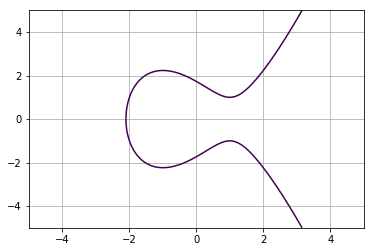

In [1]:
#@title 楕円曲線グラフ（実数）
import numpy as np
import matplotlib.pyplot as pl

a = -3
b = 3

# 楕円曲線
y, x = np.ogrid[-5:5:100j, -5:5:100j]
pl.contour(x.ravel(), y.ravel(), y**2 - x**3 - a*x - b, levels=[0])

pl.grid()
pl.show()

## 点の加算

楕円曲線上の点に対して、加算を定義します。

点を$P,Q,R$とした時、$P+Q=R$を次のように定義します。

点$P$と点$Q$の2点を通る直線が曲線と交わる点を$X$軸に対して線対称としたものを点$R$とします。

グラフにしてみます。

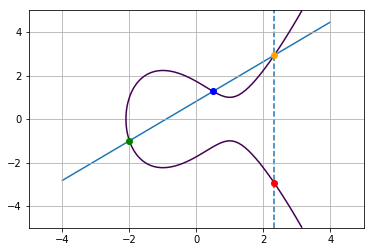

In [2]:
#@title 点の加算（楕円曲線グラフ）

# 楕円曲線
y, x = np.ogrid[-5:5:100j, -5:5:100j]
pl.contour(x.ravel(), y.ravel(), y**2 - x**3 - a*x - b, levels=[0])

# 点P
px = -2.0
py = -np.sqrt(px**3 + a*px + b)
pl.plot(px, py, 'o', color='green')

# 点Q
qx = 0.5
qy = np.sqrt(qx**3 + a*qx + b)
pl.plot(qx, qy, 'o', color='blue')

# 点Pと点Qを通る直線 s*x+t
s = (qy-py)/(qx-px)
t = py - s*px
lx = np.arange(-4, 5)
ly = s*lx + t
pl.plot(lx, ly, zorder=0)

# 点-R
poly = np.poly1d([-1, s**2, 2*s*t-a, t**2-b])
rx = max(np.roots(poly))
ry = np.sqrt(rx**3 + a*rx + b)
pl.plot(rx, ry, 'o', color='orange')

# 点R
pl.plot(rx, -ry, 'o', color='red')

pl.axvline(rx, linestyle='dashed', zorder=0)

pl.grid()
pl.show()

緑色が点$P$、青色が点$Q$、赤色が点$R$となります。

## 2倍算
簡単に言うと、2倍算とは同じ点の加算です。

楕円曲線上の点に対して、2倍算を定義します。

点$P$に対して、$2P=P+P=Q$を次のように定義します。

点$P$における曲線の接線がもう一度曲線と交わる点を$X$軸に対して線対称としたものを点$Q$とします。

グラフにしてみます。

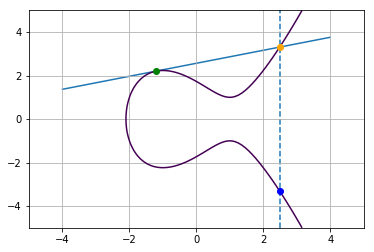

In [3]:
#@title 2倍算（楕円曲線グラフ）

# 楕円曲線
y, x = np.ogrid[-5:5:100j, -5:5:100j]
pl.contour(x.ravel(), y.ravel(), y**2 - x**3 - a*x - b, levels=[0])

# 点P
px = -1.2
py = np.sqrt(px**3 + a*px + b)
pl.plot(px, py, 'o', color='green')

# 点Pの接線 s*x+t
s = (3*px**2+a)/(2*py)
t = py - s*px
lx = np.arange(-4, 5)
ly = s*lx + t
pl.plot(lx, ly, zorder=0)

# 点-Q
poly = np.poly1d([-1, s**2, 2*s*t-a, t**2-b])
qx = max(np.roots(poly))
qy = np.sqrt(qx**3 + a*qx + b)
pl.plot(np.real(qx), np.real(qy), 'o', color='orange')

# 点Q
pl.plot(np.real(qx), np.real(-qy), 'o', color='blue')
pl.axvline(np.real(qx), linestyle='dashed', zorder=0)

pl.grid()
pl.show()

緑色が点$P$、青色が点$Q$となります。

## スカラー倍算
簡単に言うと、同じ点をスカラー（$n$）回、加算することです。

楕円曲線上の点に対して、スカラー倍を定義します。

点$P$に対して、$n$回加算したものを、$nP=P+\cdots +P$と定義します。


## 無限遠点
特殊な点を定義します。

点の加算を定義してきましたが、2点を通る直線や接線が交わらない場合があります。

この場合でも第3の点を持つ事とし、無限遠点$O$と呼びます。

$P+(-P)=O$

楕円曲線で点の加算を群にする為に必要です。

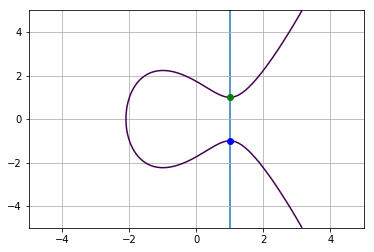

In [6]:
#@title 無限遠点（楕円曲線グラフ）

# 楕円曲線
y, x = np.ogrid[-5:5:100j, -5:5:100j]
pl.contour(x.ravel(), y.ravel(), y**2 - x**3 - a*x - b, levels=[0])

# 点P
px = 1.0
py = np.sqrt(px**3 + a*px + b)
pl.plot(px, py, 'o', color='green')
pl.plot(px, -py, 'o', color='blue')

# 無限遠点
pl.axvline(np.real(px), linestyle='solid', zorder=0)

pl.grid()
pl.show()

緑色が点$P$とした時、青色が点$-P$となります。

## 可換群（アーベル群）

これまでに定義してきた、楕円曲線の加法は可換群となります。

* 点$P,Q$において、$P+Q=R$となる点$R$が存在する。（__閉包/Closure__）
* 点$P,Q,R$において、$P+(Q+R)=(P+Q)+R$が成り立つ。（__結合法則/Associative__）
* 点$P$において、$P+O=O+P=P$となる点$O$が存在する。（__単位元/Identity element__）
* 点$P$において、$P+(-P)=(-P)+P=O$となる点$-P$が存在する。（__逆元/Inverse element__）
* 点$P,Q$において、$P+Q=Q+P$が成り立つ。（__交換法則/Commutative__）



結合法則以外に関しては、定義を見れば成り立つ事がわかると思います。

結合法則に関しても、いろいろな場合分けが必要ですが、計算で求める事ができるそうです。

# 実装



# 参考文献 (References)

*   [楕円曲線暗号 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%A5%95%E5%86%86%E6%9B%B2%E7%B7%9A%E6%9A%97%E5%8F%B7)
*   [楕円曲線 - Wikipedia](https://ja.wikipedia.org/wiki/%E6%A5%95%E5%86%86%E6%9B%B2%E7%B7%9A)
* J. H. シルヴァーマン. 楕円曲線論入門. シュプリンガー・フェアラーク東京, 1995, 351p
* 辻井 重男. 暗号理論と楕円曲線. 森北出版, 2008, 251p
